# Plotting

In [2]:
import numpy as np
import pandas as pd
import folium
import geopandas
import contextily
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from src.import_data import import_data

For the scope of this tutorial we are going to use AirBnb Scraped data for the city of Paris. The data is freely available at **Inside AirBnb**: http://insideairbnb.com/get-the-data.html.

A description of all variables in all datasets is avaliable [here](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=982310896).

We are going to use 2 datasets:

- listing dataset: contains listing-level information
- pricing dataset: contains pricing data, over time

We import and clean them with a script. If you want more details, have a look at the [data exploration](https://matteocourthoud.github.io/course/data-science/01_data_exploration/) and [data wrangling](https://matteocourthoud.github.io/course/data-science/03_data_wrangling) sections.

In [3]:
df_listings, df_prices, df = import_data()

## Intro

The default library for plotting in python is `matplotlib`. However, a more modern package that builds on top of it, is `seaborn`.

We start by telling the notebook to display the plots inline.

In [4]:
%matplotlib inline

Another important configuration is the plot resulution. We set it to `retina` to have high resolution plots.

In [5]:
%config InlineBackend.figure_format = 'retina'

You can choose set a general theme using `plt.style.use()`. The list of themes is available [here](https://matplotlib.org/3.5.1/gallery/style_sheets/style_sheets_reference.html).

In [6]:
plt.style.use('seaborn')

/var/folders/rl/wjfvvk2j6k71jz0lpkq29d4c0000gn/T/ipykernel_82239/240305066.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


If you want to further customize some aspects of a theme, you can set some global paramters for all plots. You can find a list of all the options [here](https://matplotlib.org/stable/tutorials/introductory/customizing.html). If you want to customize all plots in a project in the samy way, you can create a `filename.mplstyle` file and call it at the beginning of each file as `plt.style.use('filename.mplstyle')`.

In [7]:
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['figure.titlesize'] = 18
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['axes.titlepad'] = 20
mpl.rcParams['legend.facecolor'] = 'w'

## Distributions

Suppose you have a numerical variable and you want to see how it's distributed. The best option is to use an **histogram**. Seaborn function is `sns.histplot`.

In [8]:
df_listings['log_price'] = np.log(1+df_listings['mean_price'])

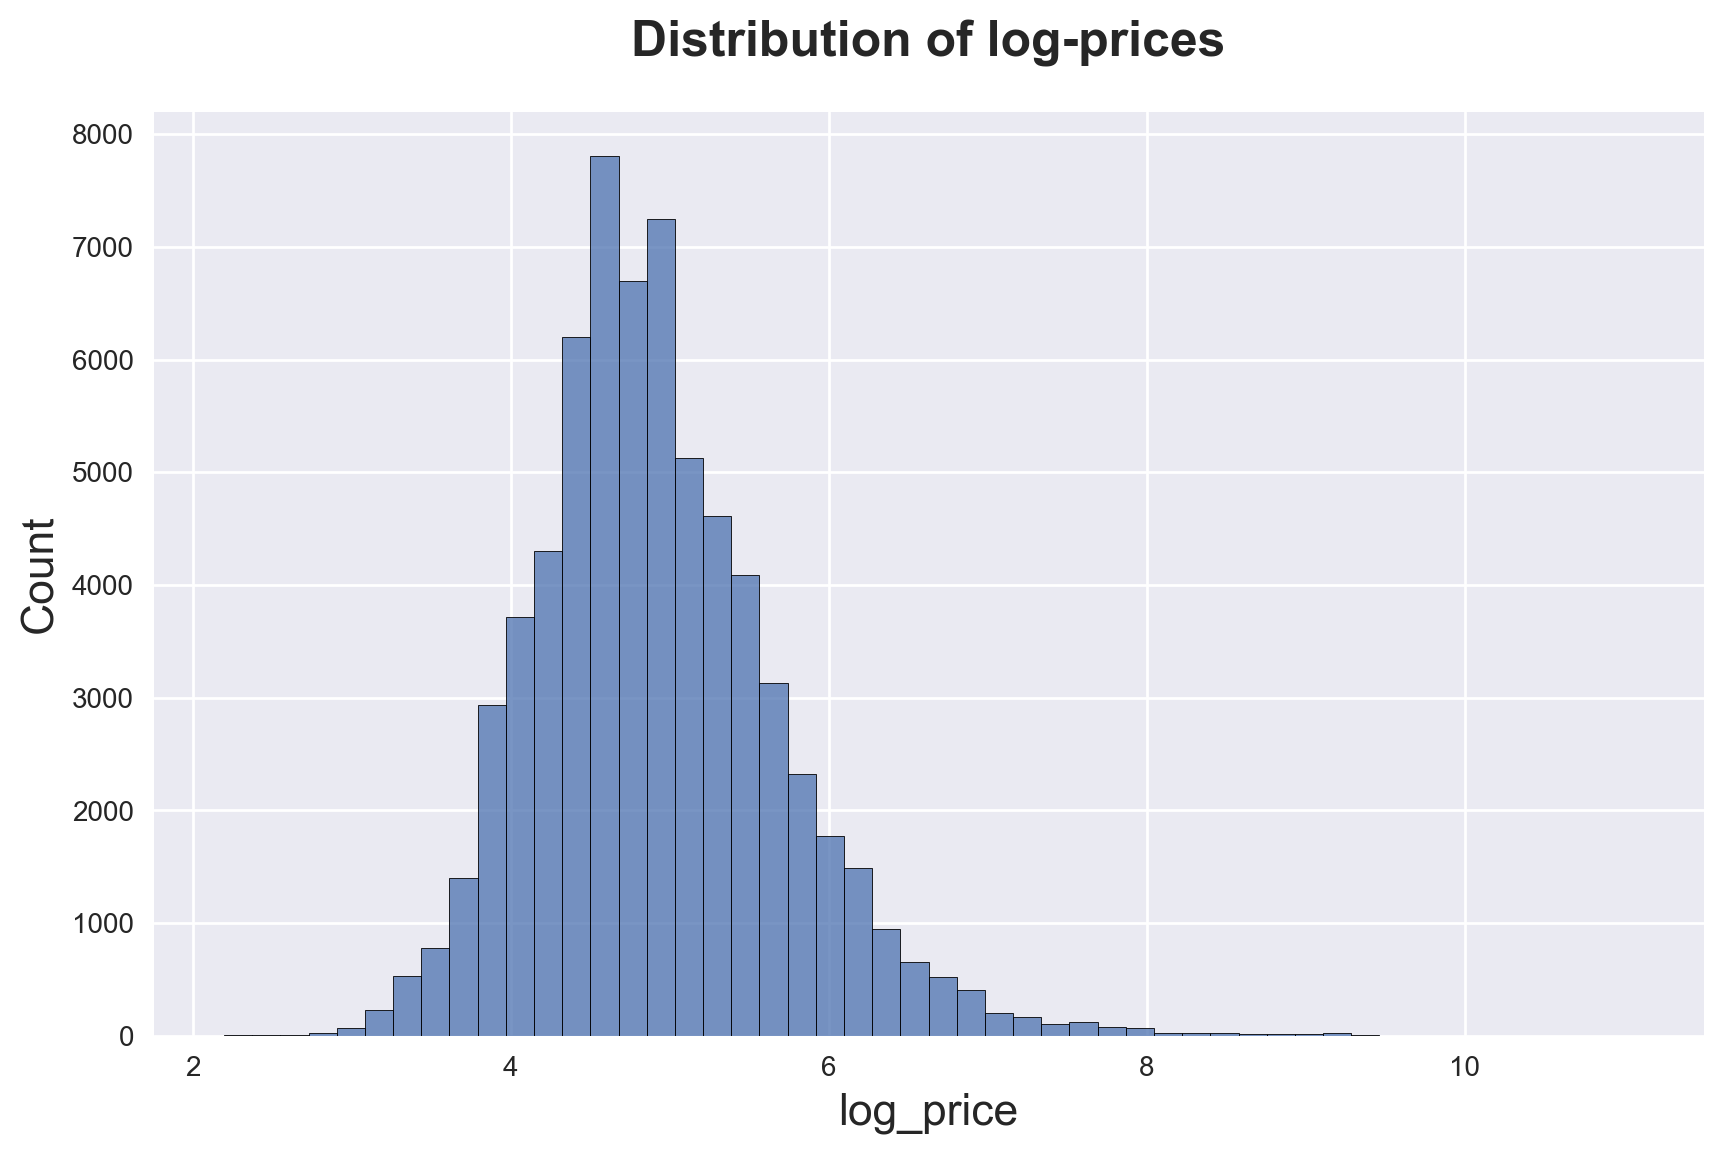

In [9]:
sns.histplot(df_listings['log_price'], bins=50)\
.set(title='Distribution of log-prices');

We can add a smooth kernel density approximation with the `kde` option.

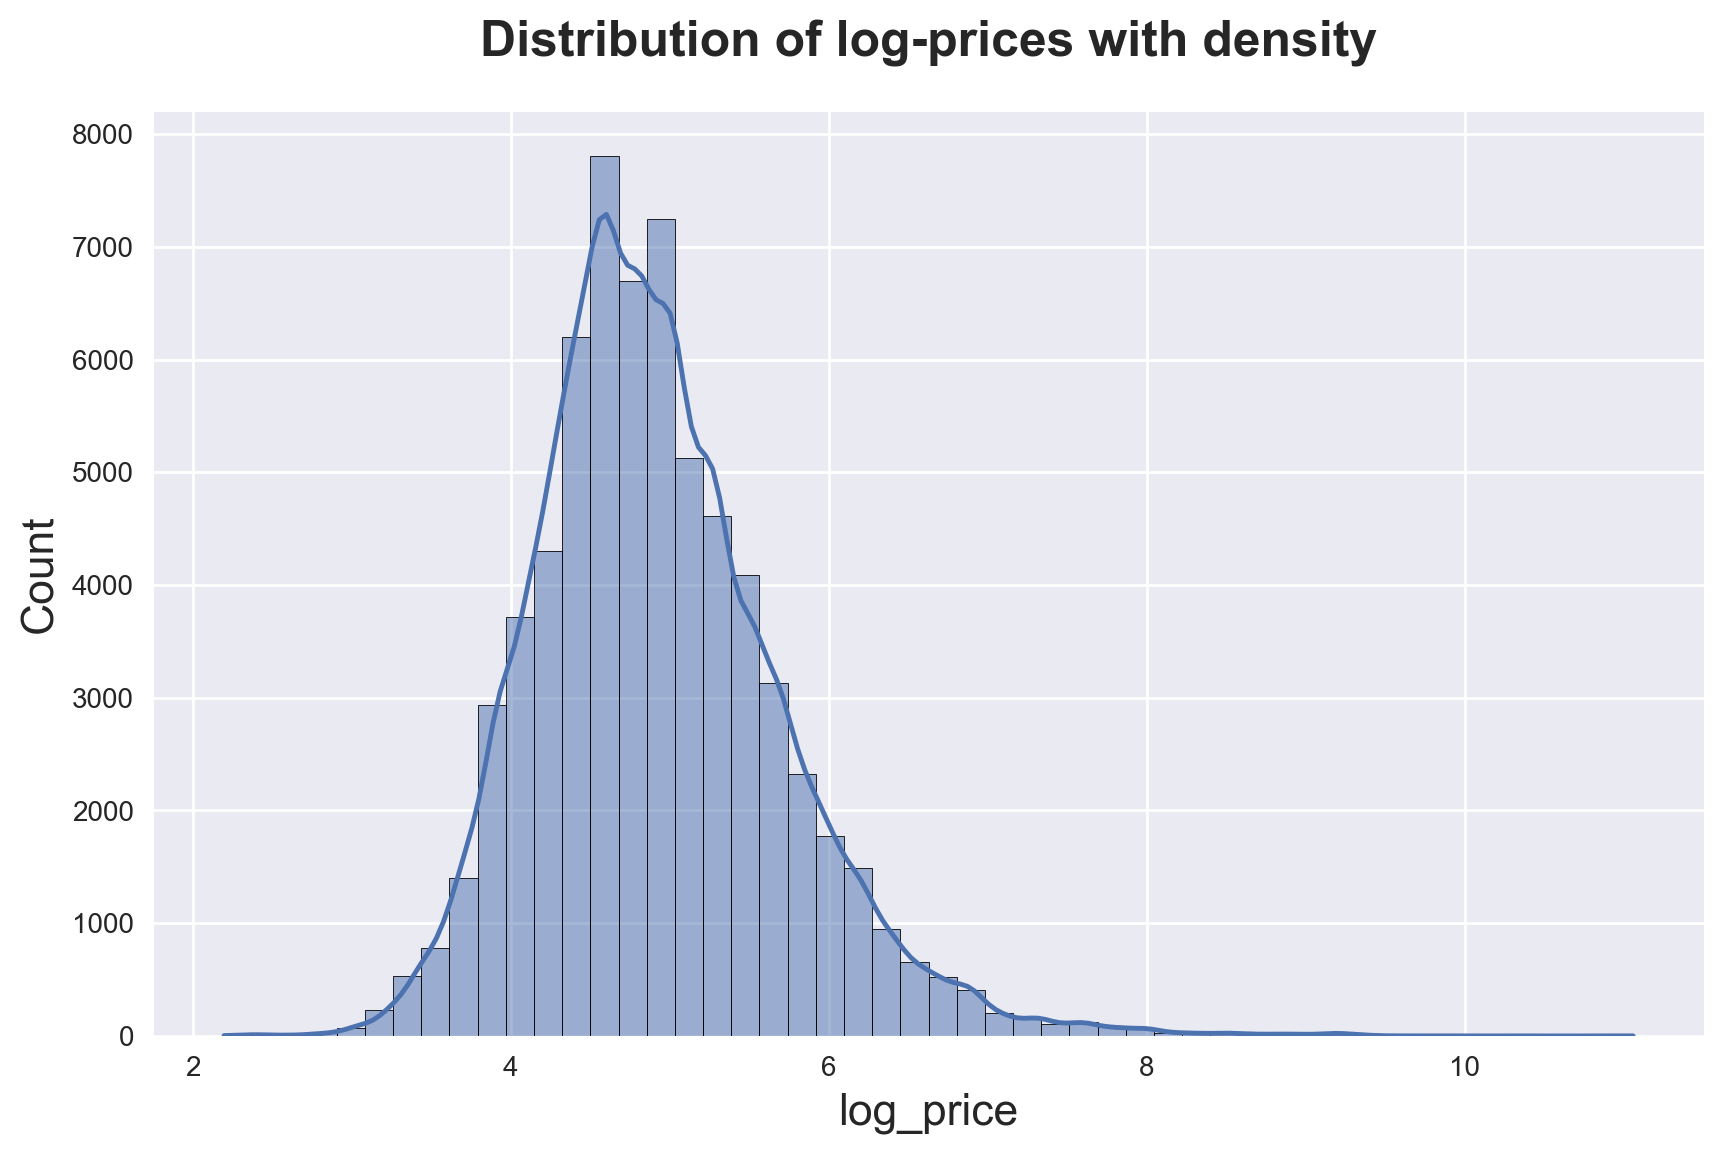

In [10]:
sns.histplot(df_listings['log_price'], bins=50, kde=True)\
.set(title='Distribution of log-prices with density');

If we have a categorical variable, we might want to plot the distribution of the data across its values. We can use a **barplot**. Seaborn function is `sns.countplot()` for count data.

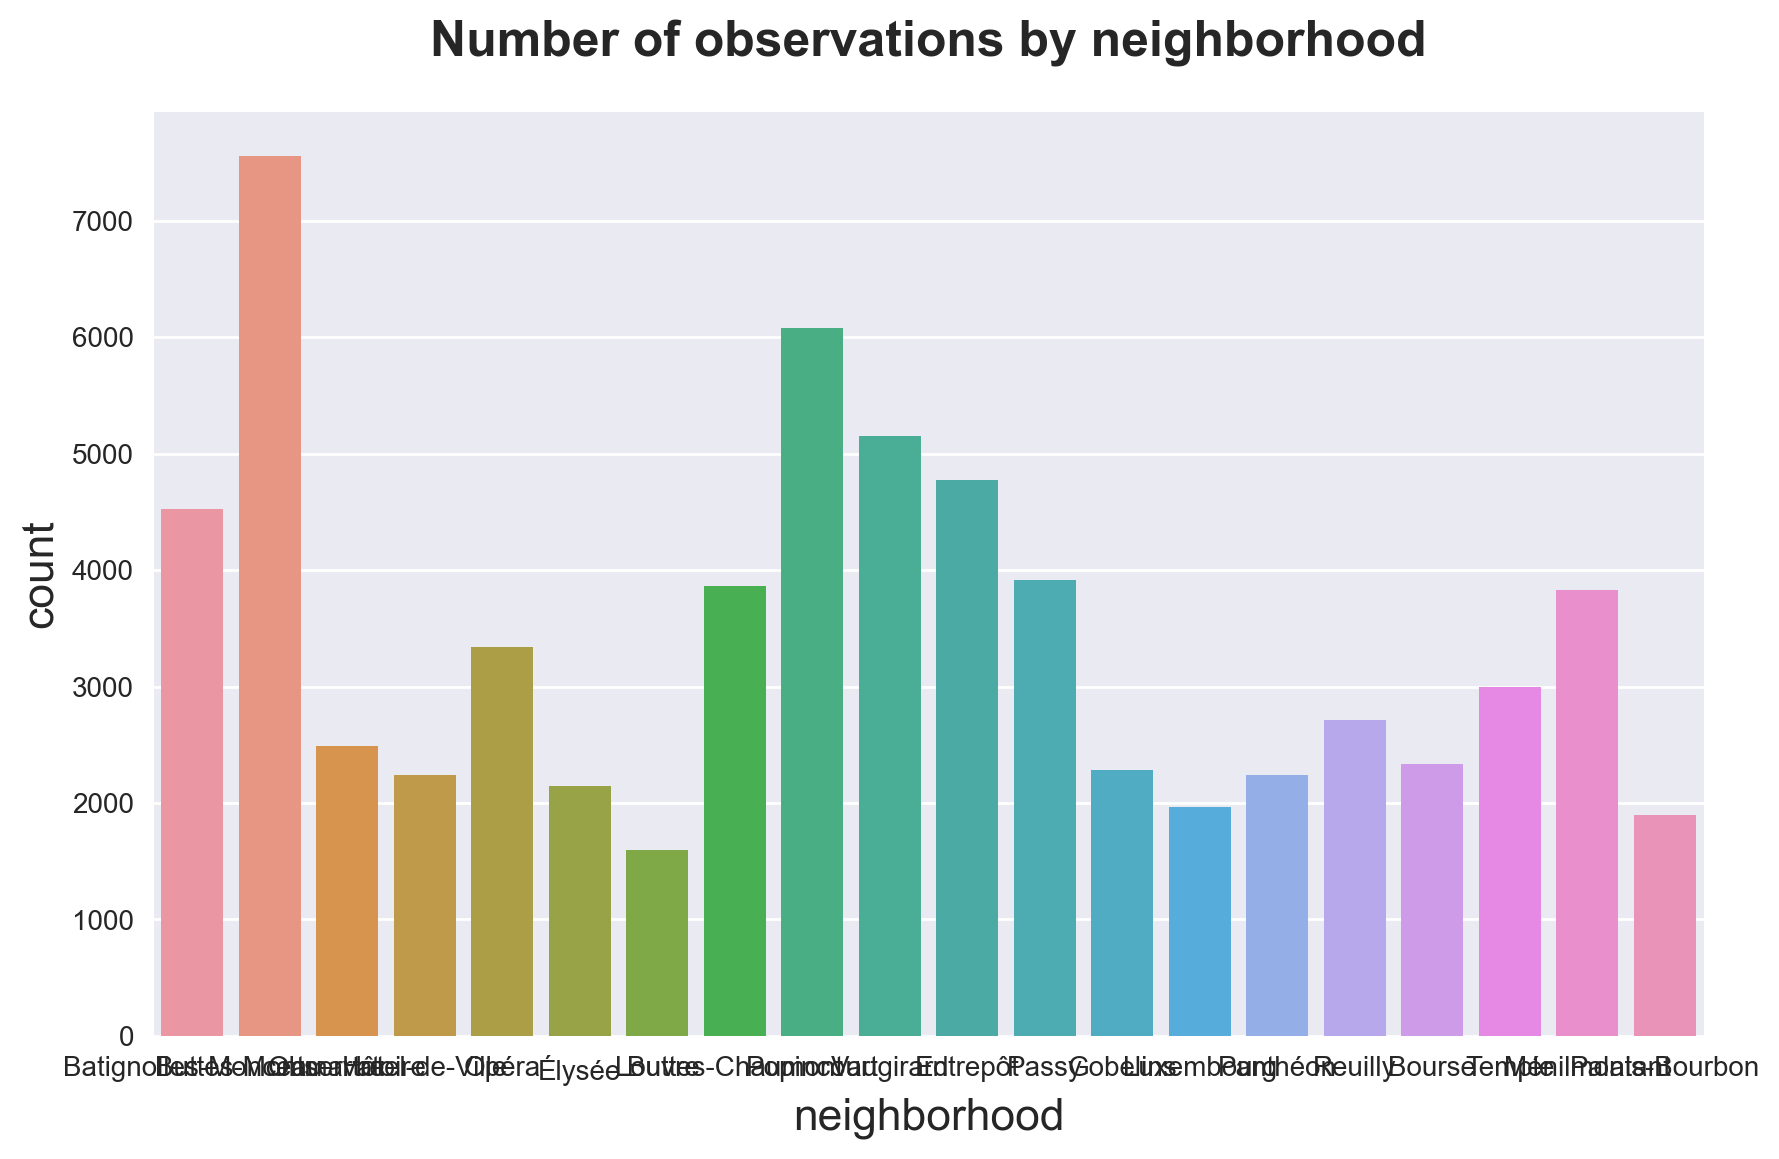

In [11]:
sns.countplot(x="neighborhood", data=df_listings)\
.set(title='Number of observations by neighborhood');

If instead we want to see the distribution of another variable across some group, we can use the `sns.barplot()` function.

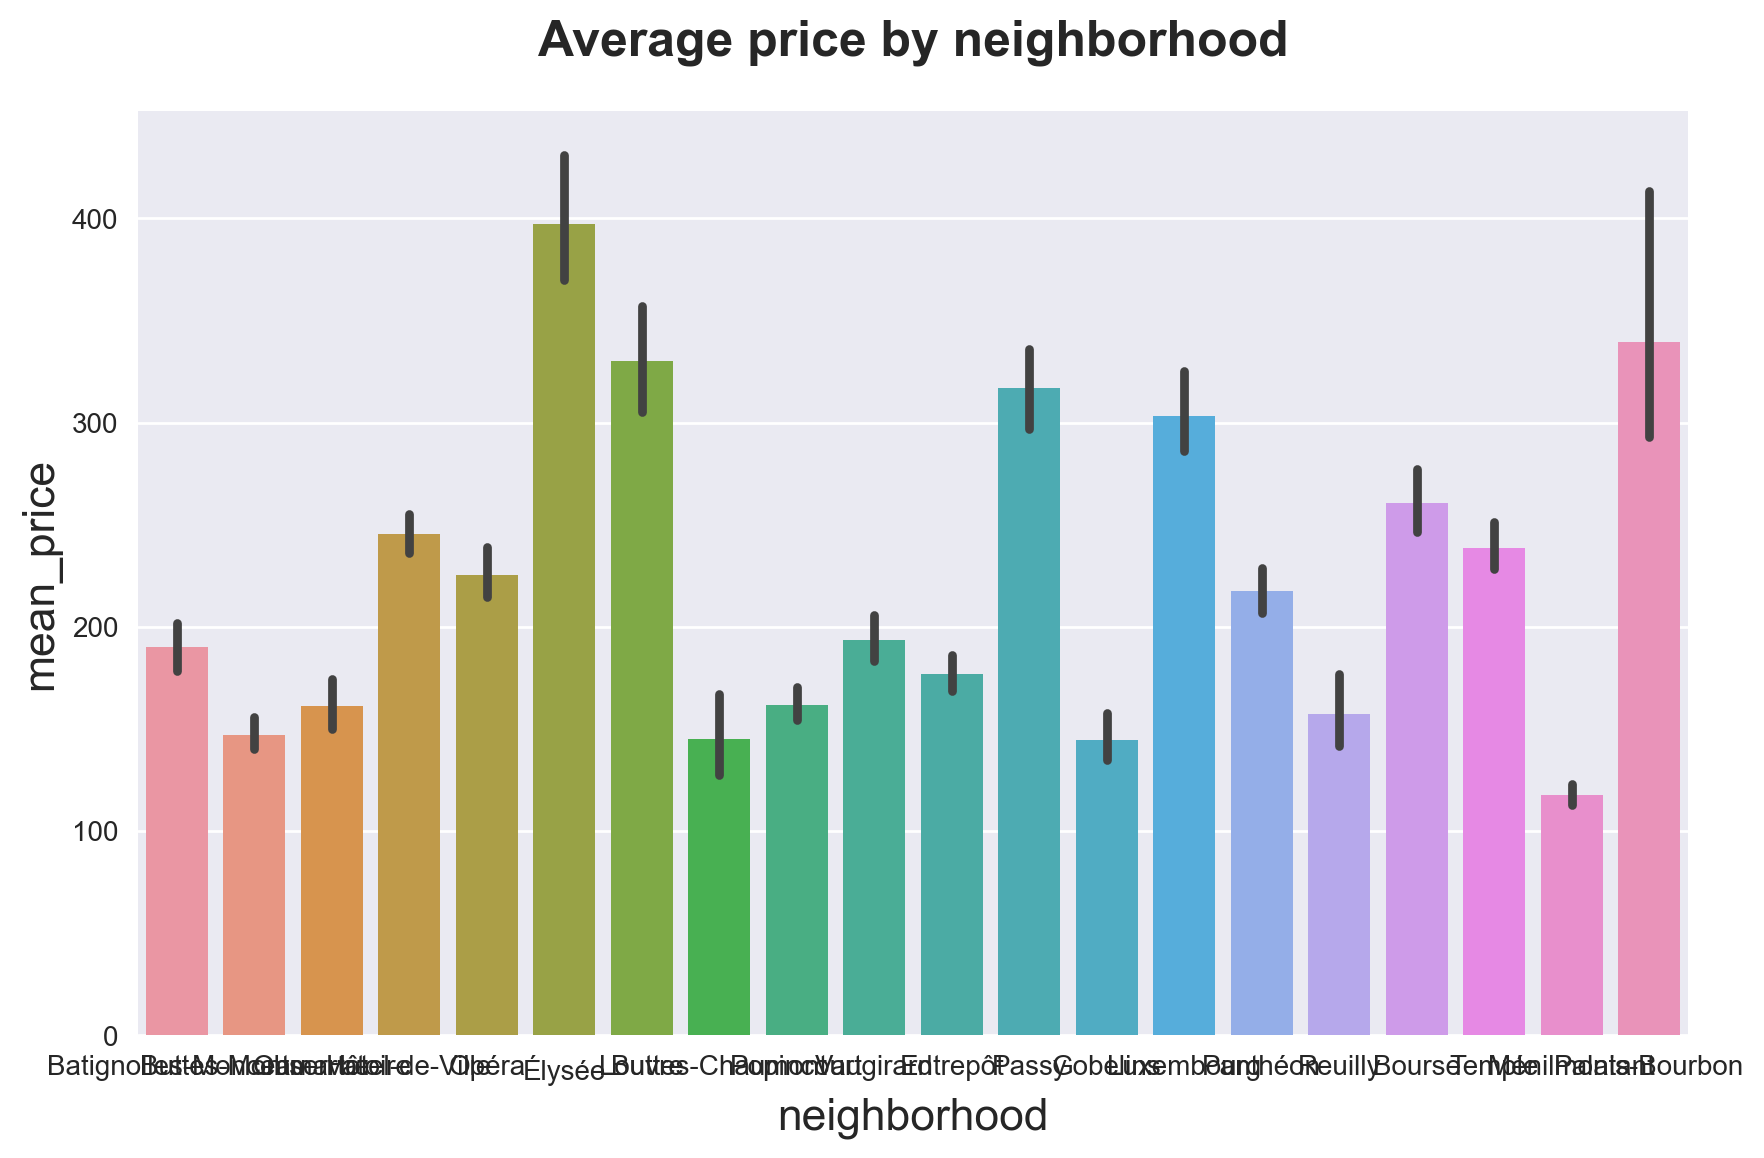

In [12]:
sns.barplot(x="neighborhood", y="mean_price", data=df_listings)\
.set(title='Average price by neighborhood');

We can also use other metrics besides the mean with the `estimator` option.

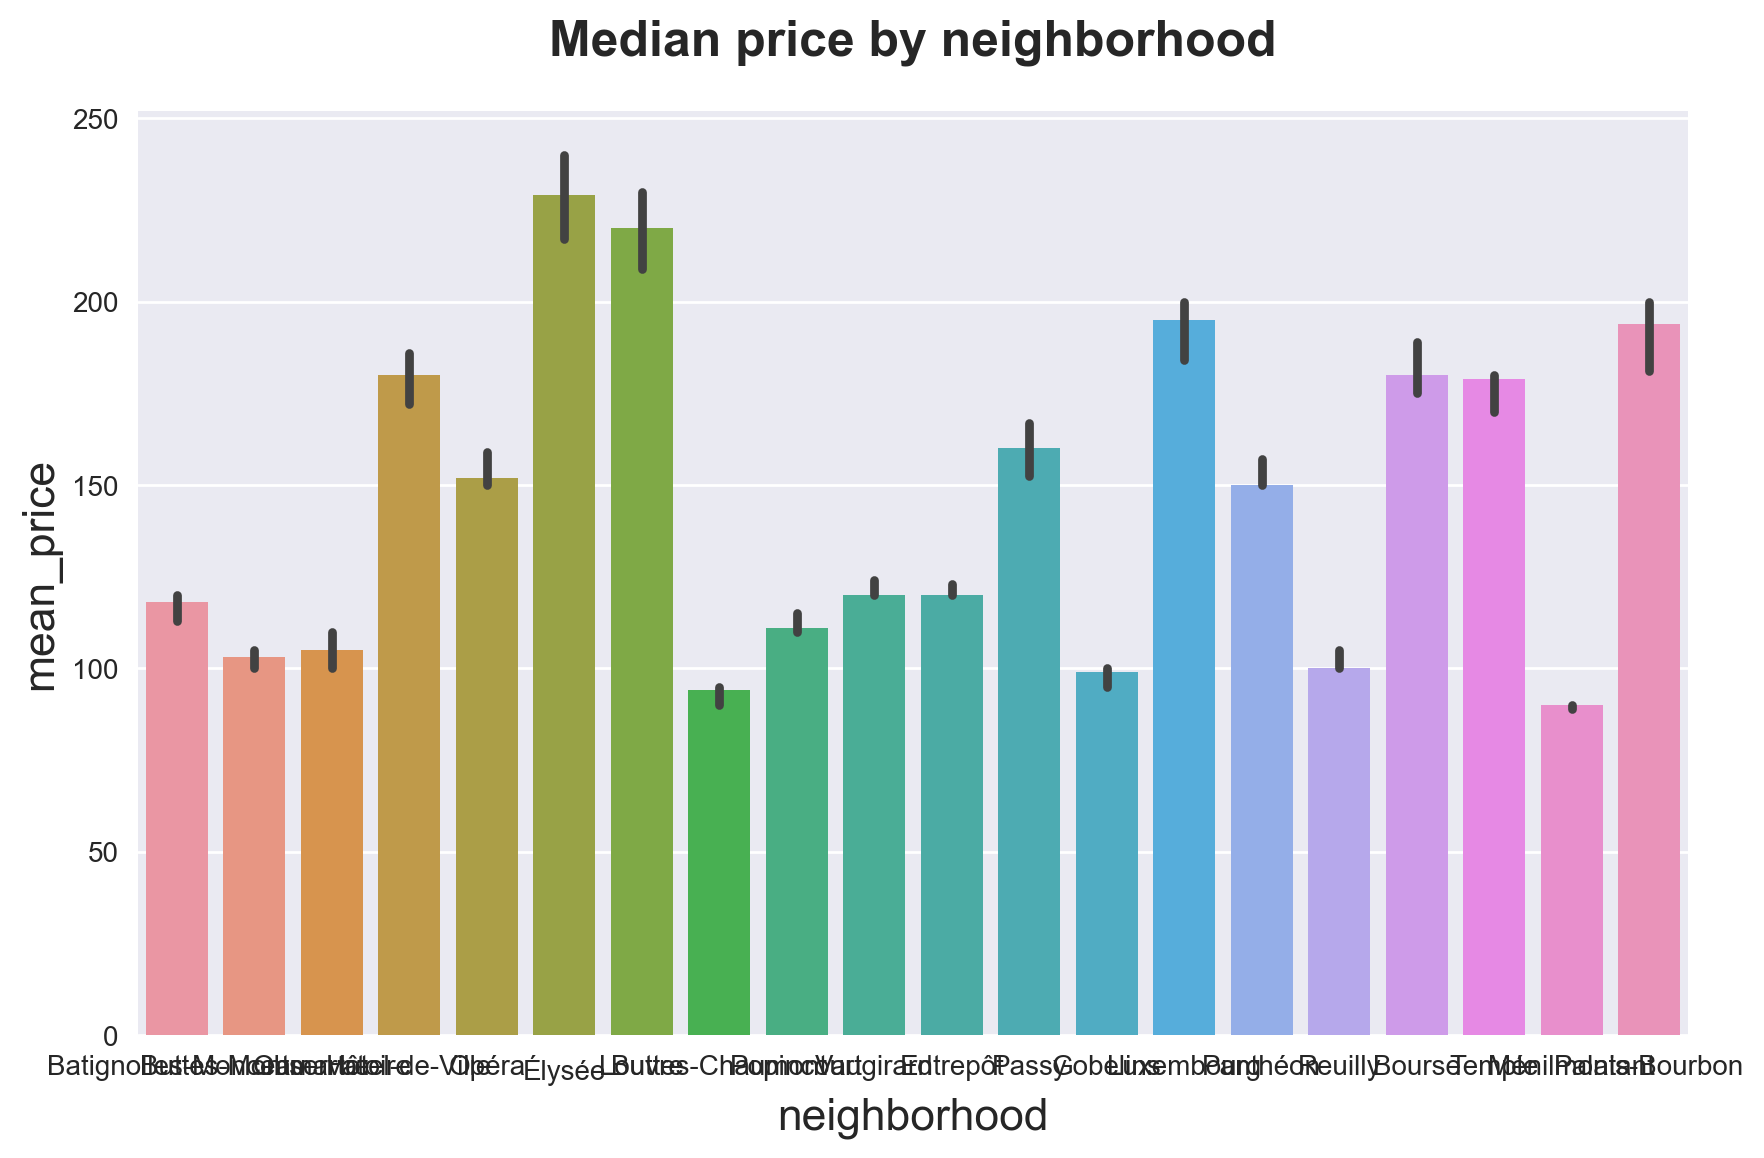

In [13]:
sns.barplot(x="neighborhood", y="mean_price", data=df_listings, estimator=np.median)\
.set(title='Median price by neighborhood');

We can also plot the full distribution using, for example **boxplots** with `sns.boxplot()`. Boxplots display quartiles and outliers.

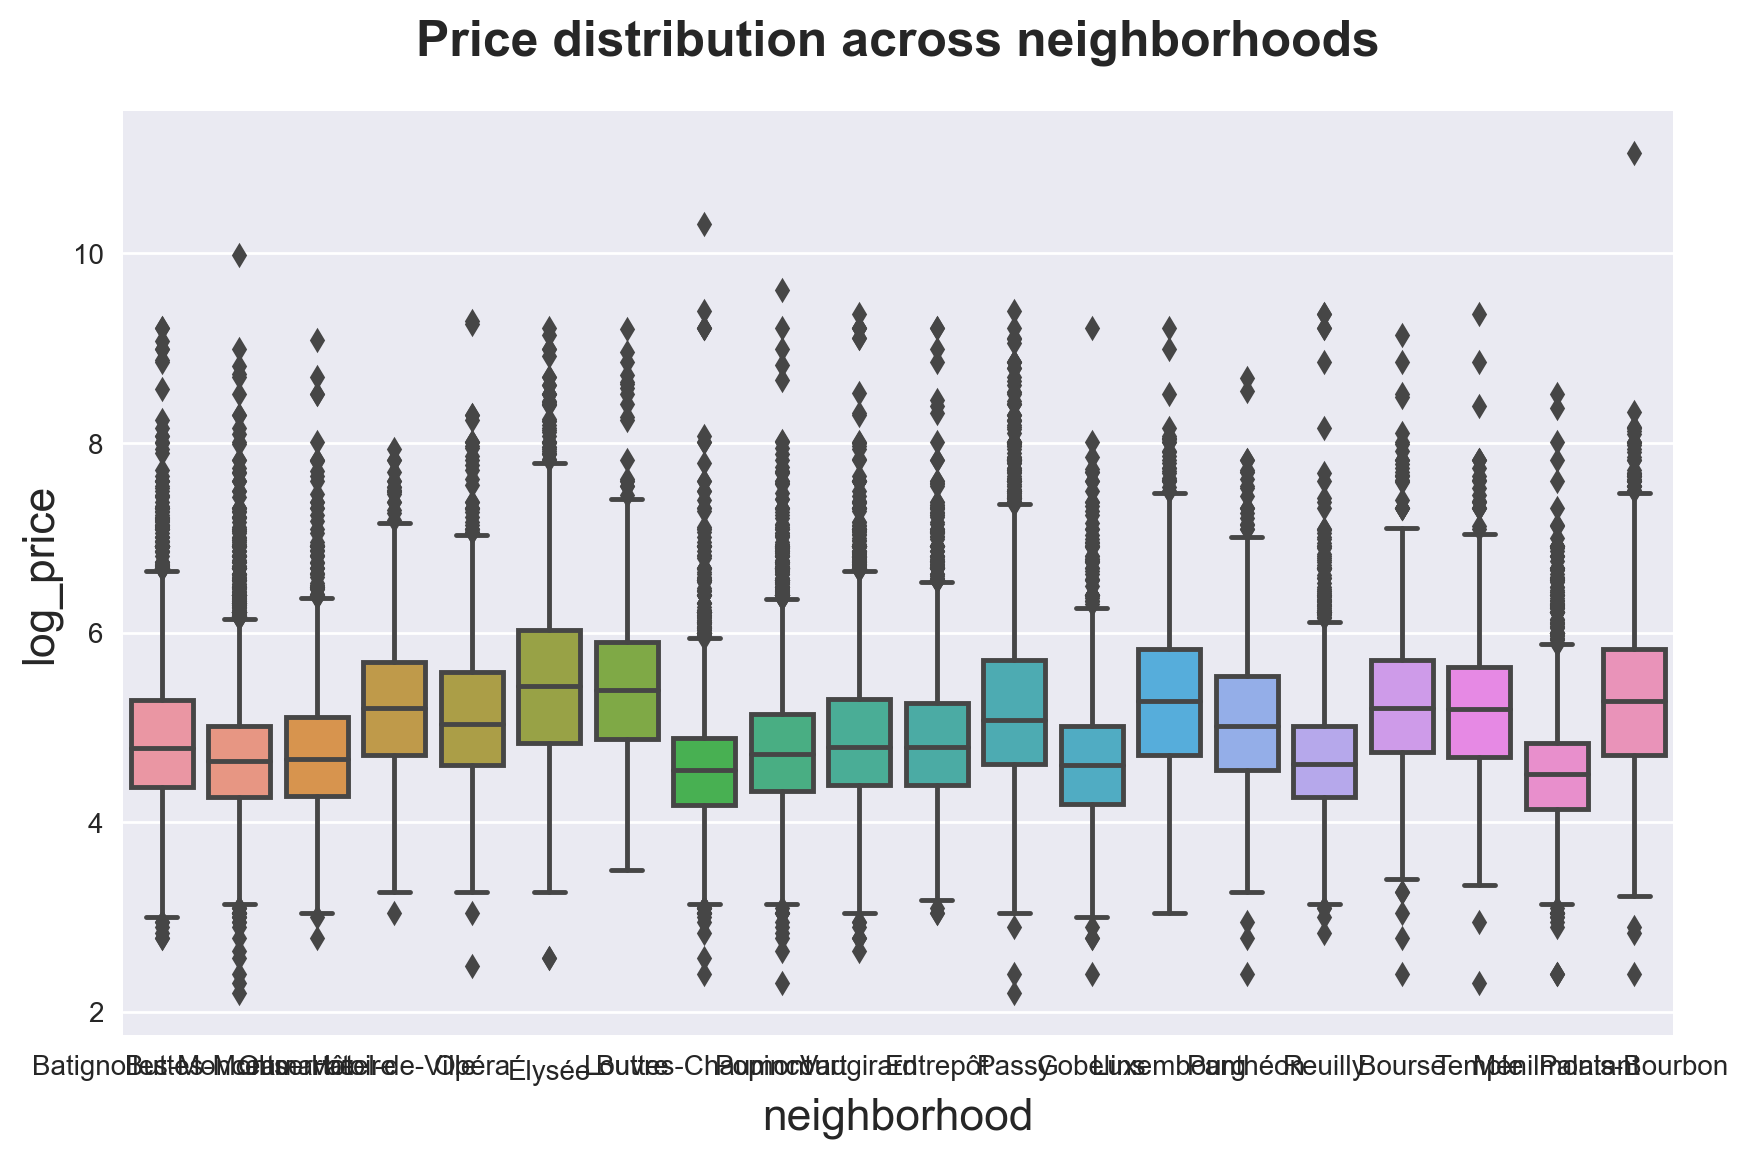

In [14]:
sns.boxplot(x="neighborhood", y="log_price", data=df_listings)\
.set(title='Price distribution across neighborhoods');

If we want to see the full distribution, we can use the `sns.violinplot()` function.

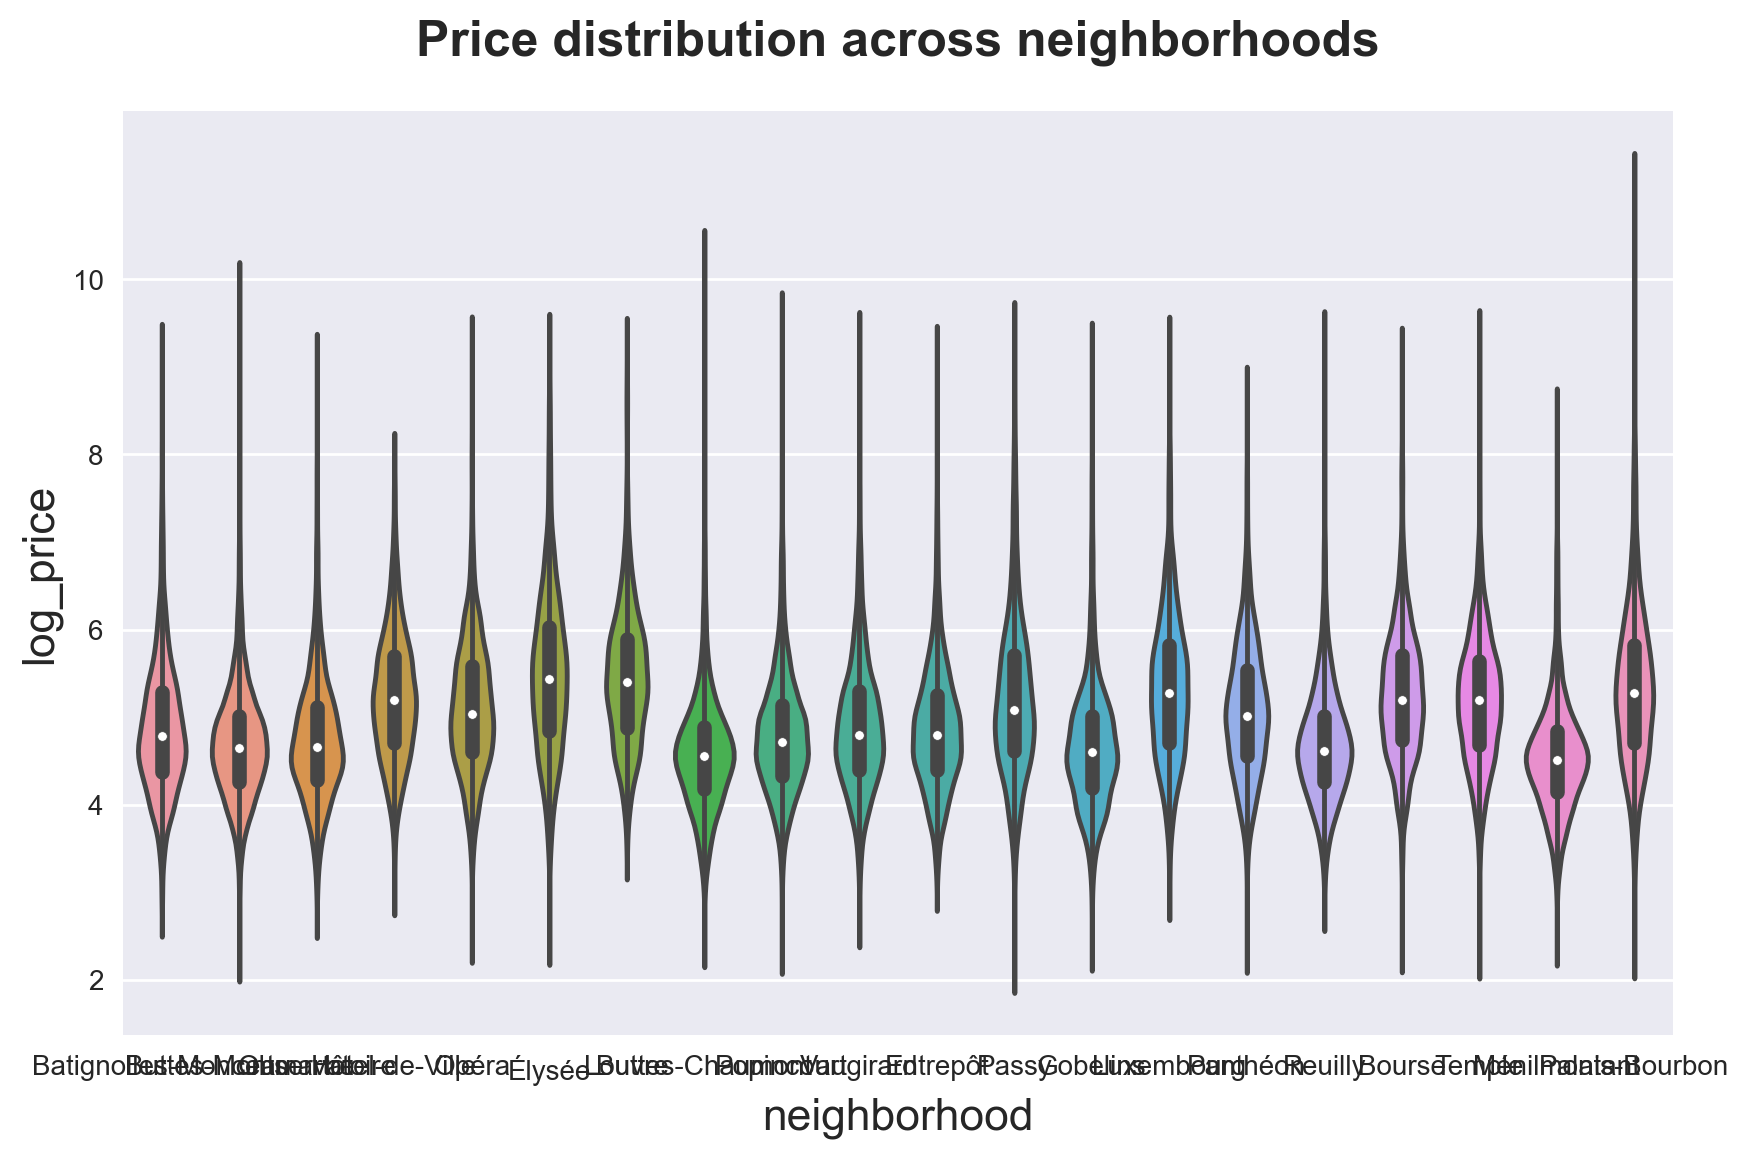

In [15]:
sns.violinplot(x="neighborhood", y="log_price", data=df_listings)\
.set(title='Price distribution across neighborhoods');

## Time Series

If the dataset has a time dimension, we might want to explore how a variable evolves over time. Seaborn function is `sns.lineplot()`. If the data has multiple observations for each time period, it will also display a 95% confidence interval around the mean.

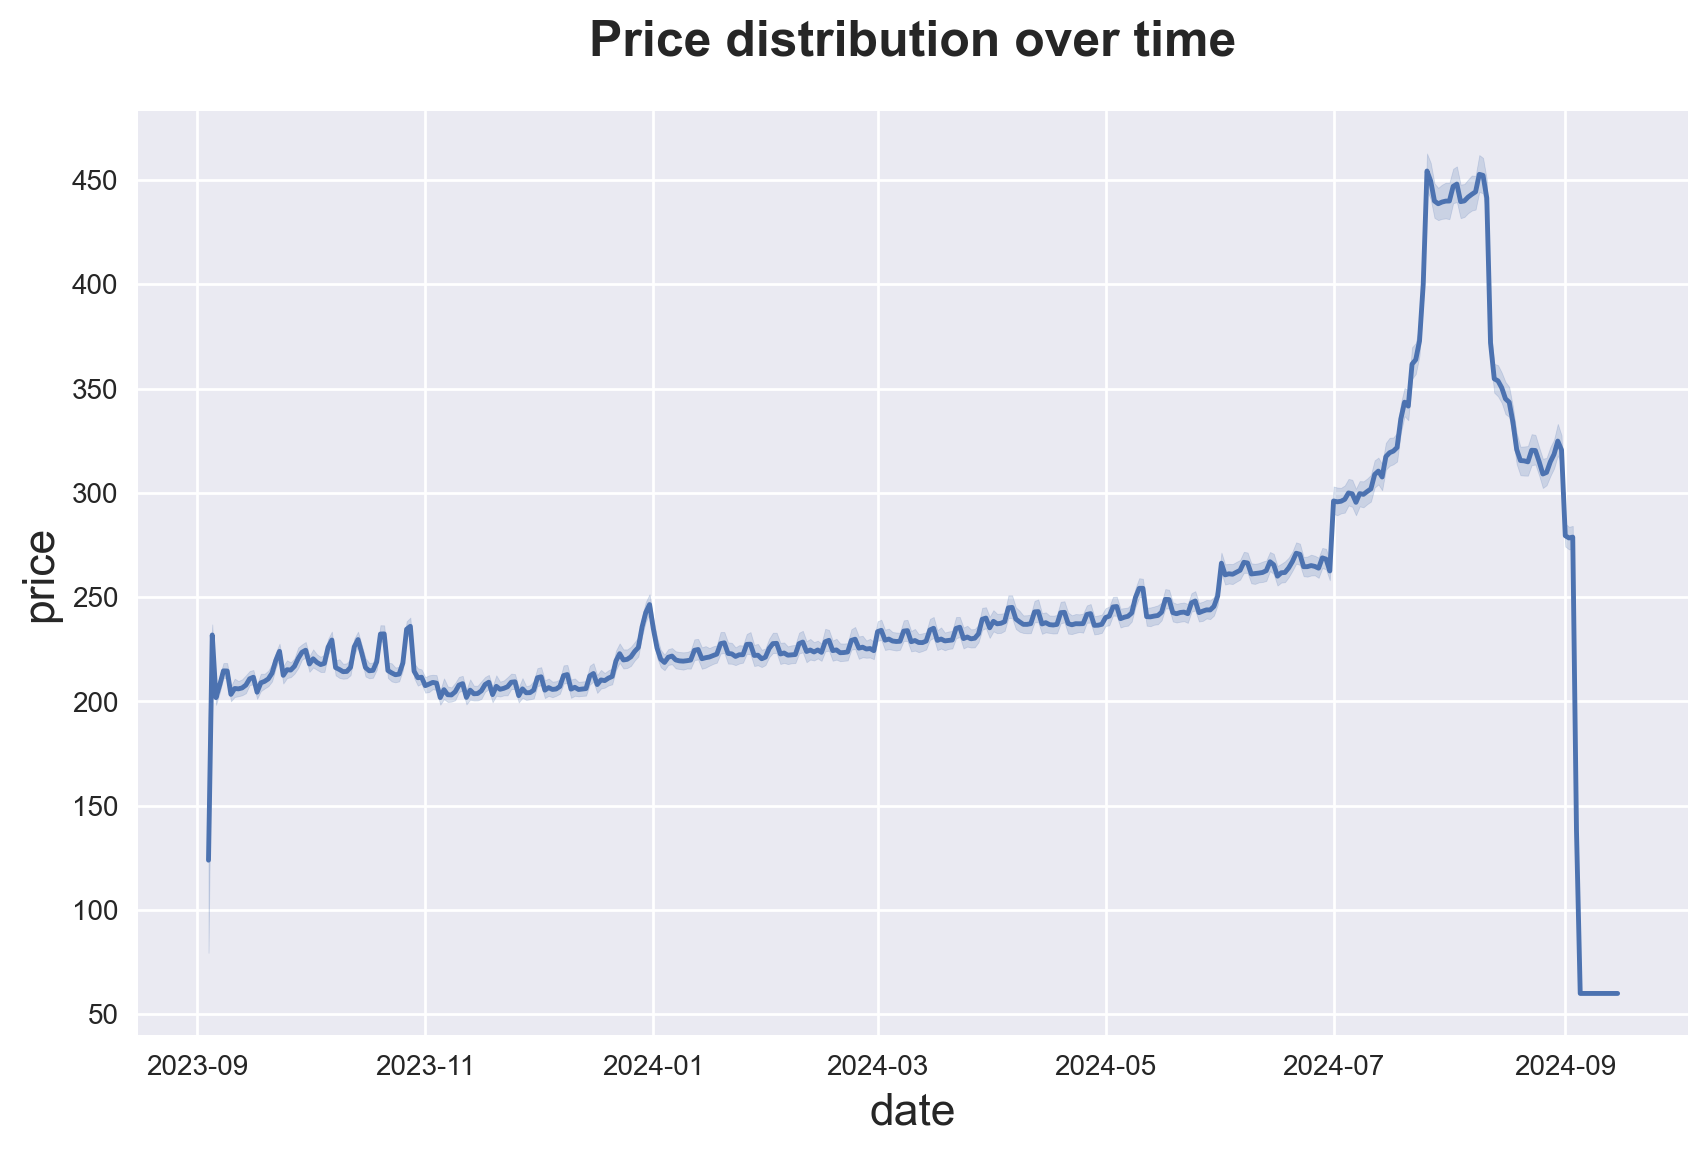

In [16]:
sns.lineplot(data=df, x='date', y='price')\
.set(title="Price distribution over time");

We can do the samy by group, with the `hue` option. We can suppress confidence intervals setting `ci=None` (making the code much faster).

/var/folders/rl/wjfvvk2j6k71jz0lpkq29d4c0000gn/T/ipykernel_82239/1237367165.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='date', y='price', hue='neighborhood', ci=None)\


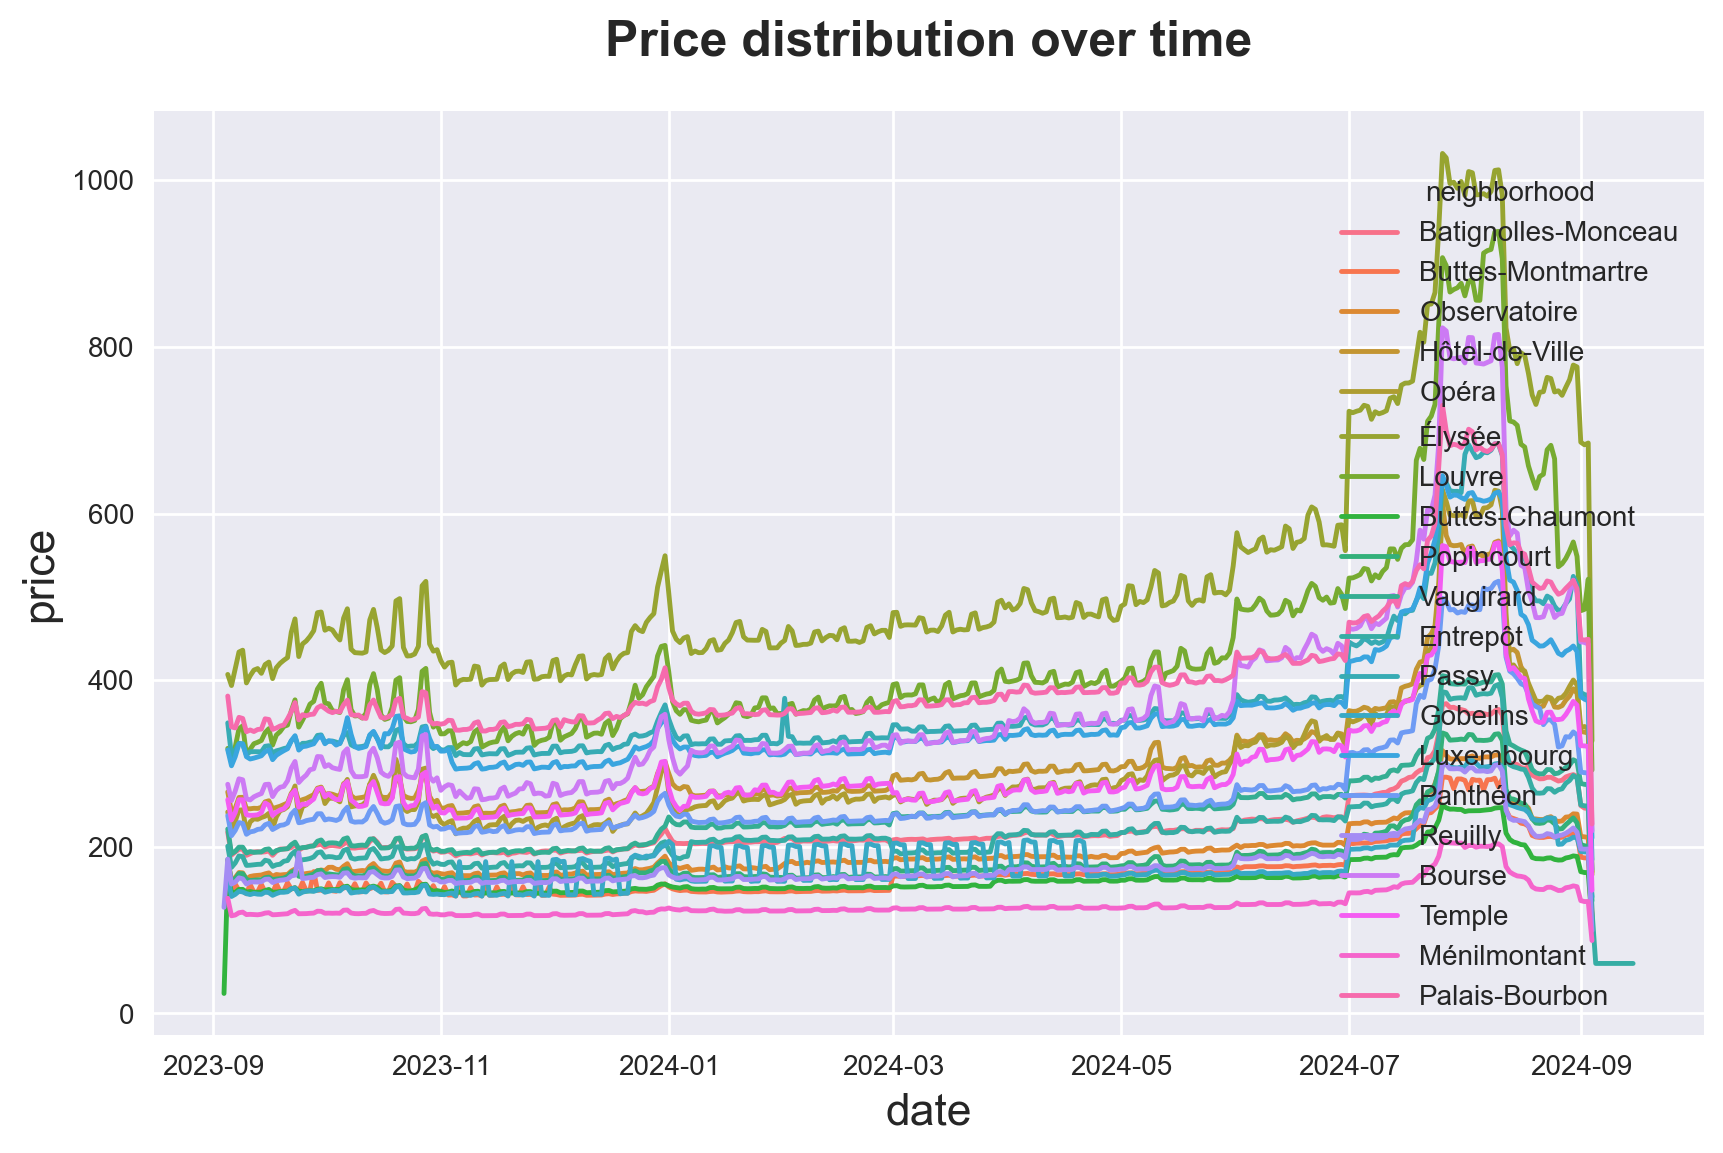

In [17]:
sns.lineplot(data=df, x='date', y='price', hue='neighborhood', ci=None)\
.set(title="Price distribution over time");

## Correlations

In [18]:
df_listings["log_reviews"] = np.log(1 + df_listings["number_of_reviews"])
df_listings["log_rpm"] = np.log(1 + df_listings["reviews_per_month"])

The most intuitive way to plot a correlation between two variables is a **scatterplot**. Seaborn function is `sns.scatterplot()`

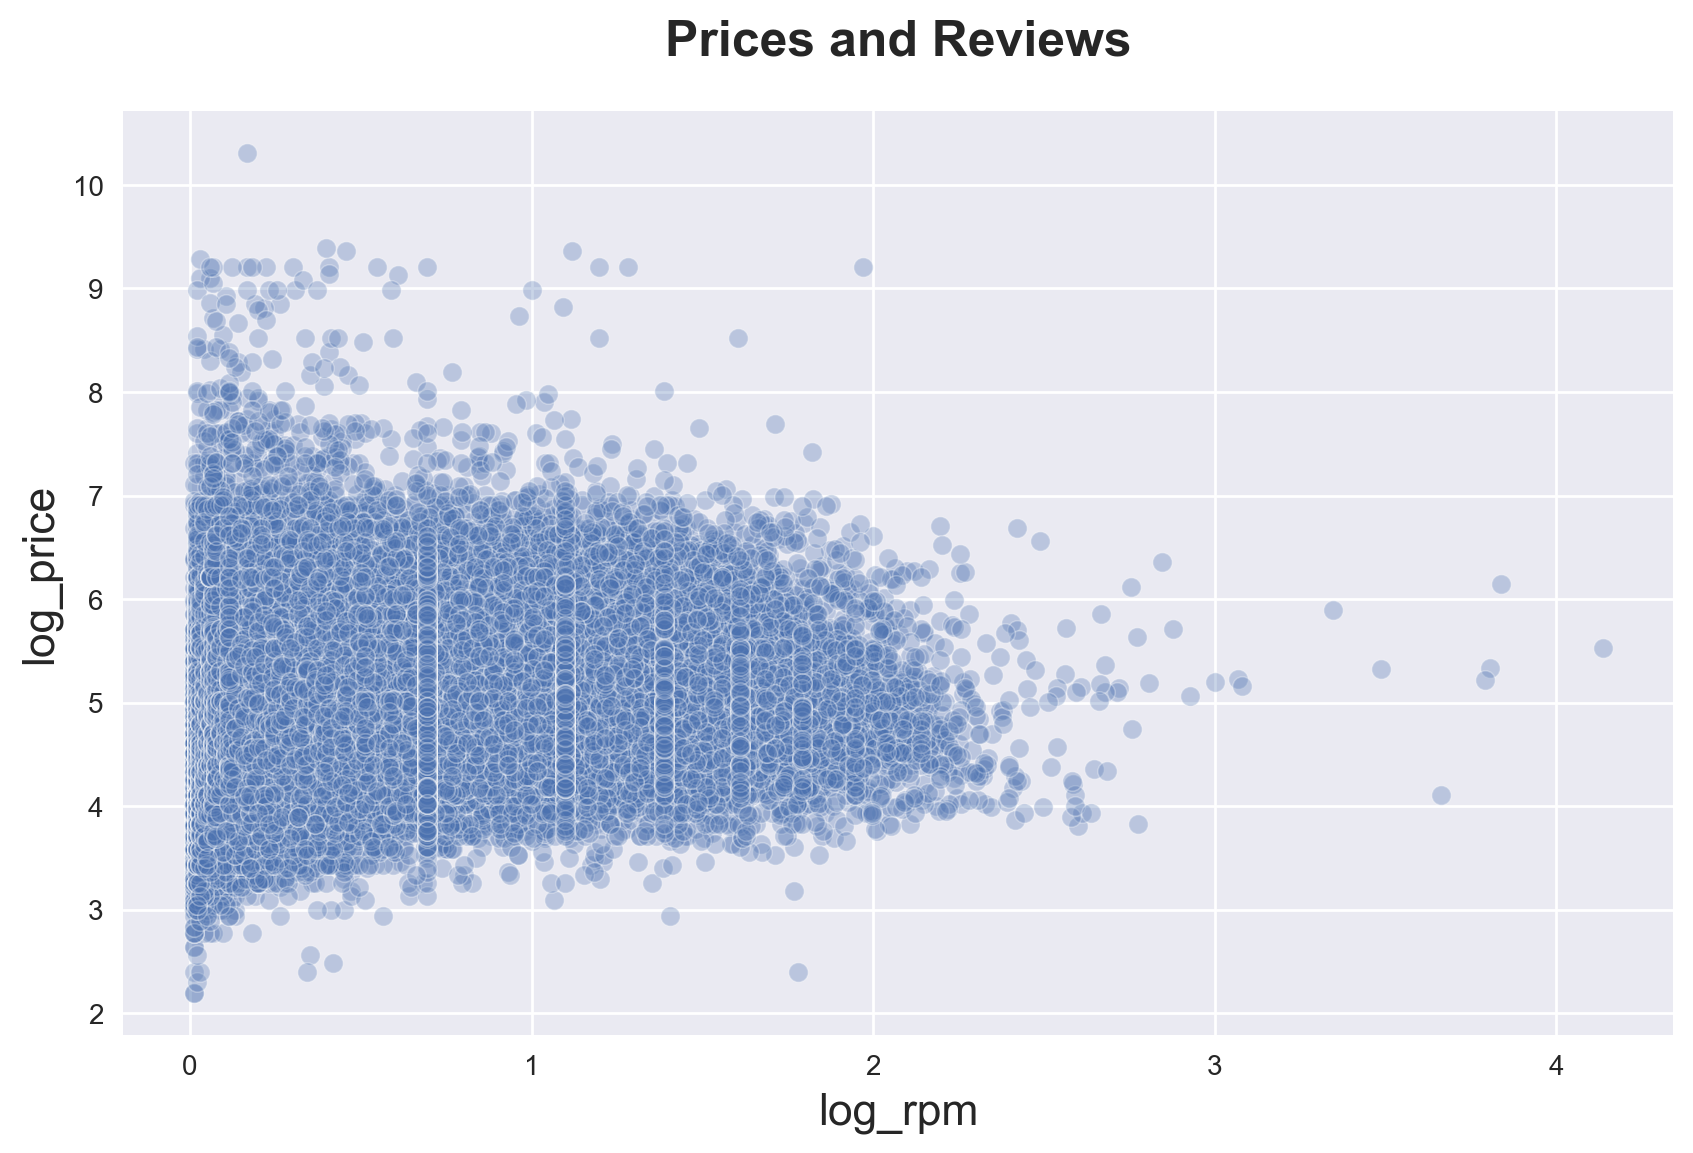

In [19]:
sns.scatterplot(data=df_listings, x="log_rpm", y="log_price", alpha=0.3)\
.set(title='Prices and Reviews');

We can highlight the best linear approximation adding a line of fit using `sns.regplot()`.

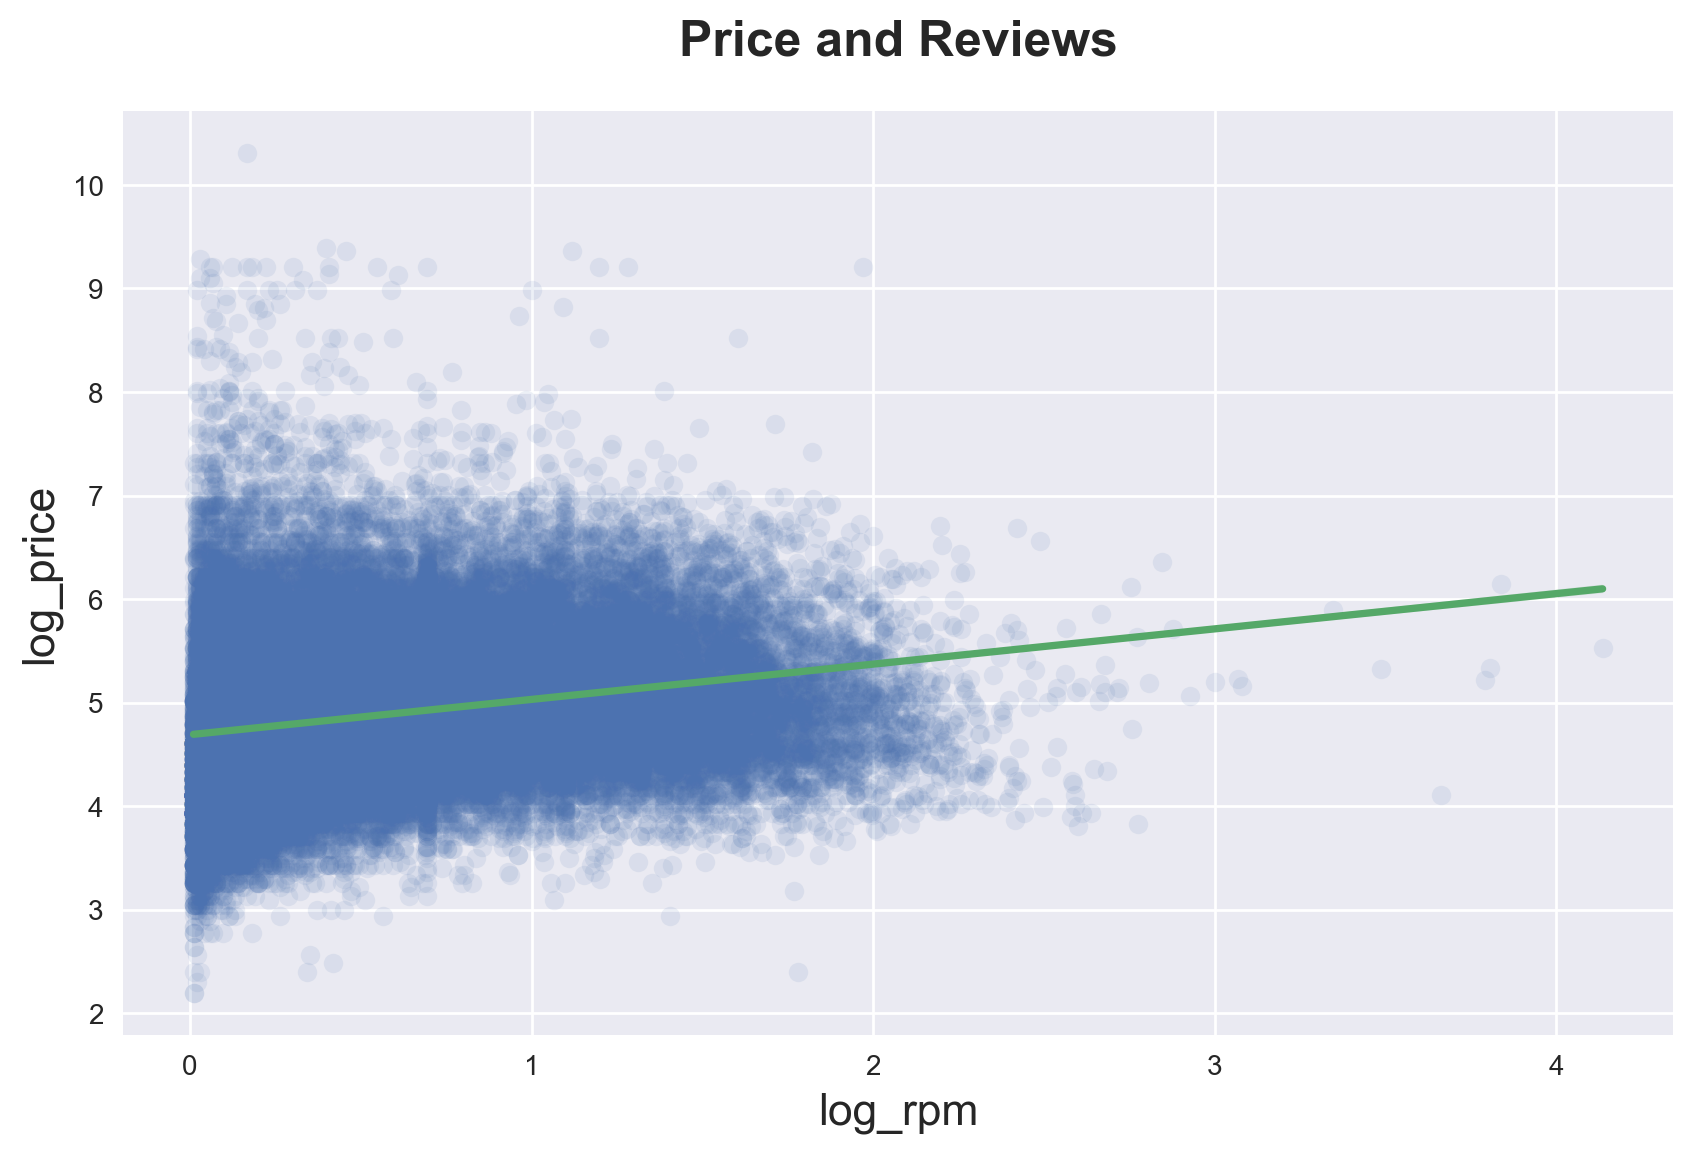

In [20]:
sns.regplot(x="log_rpm", y="log_price", data=df_listings,
            scatter_kws={'alpha':.1},
            line_kws={'color':'C1'})\
.set(title='Price and Reviews');

If we want a more flexible representation of the data, we can use the `binscatter` package. `binscatter` splits the data into equally sized bins and displays a scatterplot of the averages.

The main difference between a binscatterplot and an histogram is that in a histogram bins have the same *width* while in a binscatterplot bins have the same *number of observations*.

An advantage of `binscatter` is that it makes the nature of the data much more transparent, at the cost of hiding some of the background noise.

In [21]:
import binscatter

# Remove nans
temp = df_listings[["log_rpm", "log_price"]].dropna()

# Binned scatter plot of Wage vs Tenure
fig, ax = plt.subplots()
ax.binscatter(temp["log_rpm"], temp["log_price"]);
ax.set_title('Price and Reviews');

ModuleNotFoundError: No module named 'binscatter'

As usual, we can split the data by group with the `hue` option.

In [ ]:
sns.scatterplot(data=df_listings, x="log_rpm", y="log_price", 
                hue="room_type", alpha=0.3)\
.set(title="Prices and Ratings, by room type");

We can also add the marginal distributions using the `sns.jointplot()` function.

In [ ]:
sns.jointplot(data=df_listings, x="log_rpm", y="log_price", kind="hex")\
.fig.suptitle("Prices and Reviews, with marginals")  
plt.subplots_adjust(top=0.9);

If we want to plot correlations (and marginals) of multiple variables, we can use the `sns.pairplot()` function.

In [ ]:
sns.pairplot(data=df_listings,
             vars=["log_rpm", "log_reviews", "log_price"],
             plot_kws={'s':2})\
.fig.suptitle("Correlations");
plt.subplots_adjust(top=0.9)

We can distinguish across groups with the `hue` option.

In [ ]:
sns.pairplot(data=df_listings,
             vars=["log_rpm", "log_reviews", "log_price"],
             hue='room_type',
             plot_kws={'s':2})\
.fig.suptitle("Correlations, by room type");
plt.subplots_adjust(top=0.9)

If we want to plot all the correlations in the data, we can use the `sns.heatmap()` function on top of a correlation matrix generated by `.corr()`.

In [ ]:
# Plot
sns.heatmap(df.corr(), vmin=-1, vmax=1, linewidths=.5, cmap="RdBu")\
 .set(title="Correlations");

## Geographical data

We can in principle plot geographical data as a simple scatterplot.

In [ ]:
sns.scatterplot(data=df_listings, x="longitude", y="latitude")\
.set(title='Listing coordinates');

However, we can do better and do the scatterplot over a map layer.

First, we neeed to convert the `latitude` and `longitude` variables into coordinates. We use the library `geopandas`. Note that the original coordinate system is `4326` (3D) and we need to `3857` (2D).

In [ ]:
geom = geopandas.points_from_xy(df_listings.longitude, df_listings.latitude)
gdf = geopandas.GeoDataFrame(
    df_listings, 
    geometry=geom,
    crs=4326).to_crs(3857)

We import a map of Paris using the library `contextily`.

In [ ]:
Paris = contextily.Place("Paris", source=contextily.providers.Stamen.TonerLite)

We are now ready to plot it with the airbnb listings.

In [ ]:
ax = Paris.plot()
ax.set_ylim([5530000, 5555000])
gdf.plot(ax=ax, c=df_listings['mean_price'], cmap='viridis', alpha=0.8);

In [1]:
from typing import Dict, Iterable, List, Optional, Tuple